In [1]:
import numpy as np 
import networkx as nx
import pandas as pd
import json
from pprint import pprint
pd.core.common.is_list_like = pd.api.types.is_list_like 

from tools.comparisons import *
from tools.data_transform import *
from hypotheses.sign_statistics import *
from hypotheses.sign_tests import *
from distributions.multivariate_normal import norm_seq
from distributions.multivariate_t import student_seq



In [ ]:
def total_compare(ref_MST, ref_corr, stocks, title):
    print('normal')
    normal = compare_norm(ref_MST, ref_corr, stocks, observ_num=[20], iters=10, alphas=[0.1])
    with open(f"data/{title}_normal.json", "w") as write_file:
        json.dump(normal, write_file)
        
    print('student')
    student = compare_stud(ref_MST, ref_corr, stocks, observ_num=[20], iters=10, alphas=[0.1], dofs=[2, 3])
    with open(f"data/{title}_student.json", "w") as write_file:
        json.dump(student, write_file)
        
    print('mix')
    mix = compare_mix(ref_MST, ref_corr, stocks, observ_num=[20], iters=10, alphas=[0.1], dofs=[2, 3], norm_rates=[0.5, 0.3])
    with open(f"data/{title}_mix.json", "w") as write_file:
        json.dump(mix, write_file)


In [2]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.5, 0, 0, 0, 0],\
        [0.5, 1, 0.5, 0, 0, 0],\
        [0, 0.5, 1, 0.5, 0, 0],\
        [0, 0, 0.5, 1, 0.5, 0],\
        [0, 0, 0, 0.5, 1, 0.5],\
        [0, 0, 0, 0, 0.5, 1]]

In [3]:
corr = np.corrcoef(norm_seq(corr, 1000))
corr

array([[ 1.00000000e+00,  5.00176860e-01, -1.16941741e-02,
        -4.13811535e-02, -5.16669480e-02, -4.90213132e-02],
       [ 5.00176860e-01,  1.00000000e+00,  5.01659632e-01,
         2.31125913e-02,  6.83048175e-04, -4.33589691e-03],
       [-1.16941741e-02,  5.01659632e-01,  1.00000000e+00,
         5.37543118e-01,  2.26918093e-02,  4.39562146e-02],
       [-4.13811535e-02,  2.31125913e-02,  5.37543118e-01,
         1.00000000e+00,  4.78590965e-01,  2.74167422e-03],
       [-5.16669480e-02,  6.83048175e-04,  2.26918093e-02,
         4.78590965e-01,  1.00000000e+00,  4.85073036e-01],
       [-4.90213132e-02, -4.33589691e-03,  4.39562146e-02,
         2.74167422e-03,  4.85073036e-01,  1.00000000e+00]])

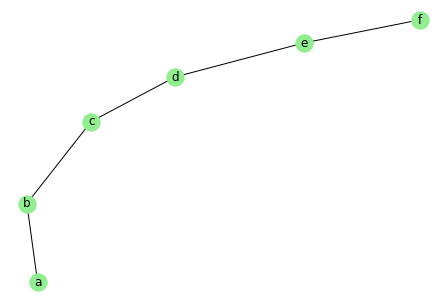

In [4]:
ref_MST1 = create_Kruskal_MST(corr, stcks)
nx.draw(ref_MST1, with_labels=True, node_color='lightgreen')

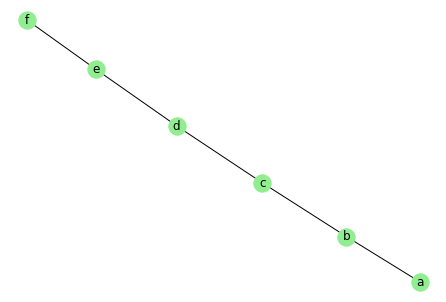

In [5]:
ref_MST2 = create_Prim_MST(corr, stcks)
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')

In [ ]:
total_compare(ref_MST1, corr, stcks, 'path')